# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
df=pd.read_csv("/content/50_Startups.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and Data Visualizations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<ipython-input-31-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

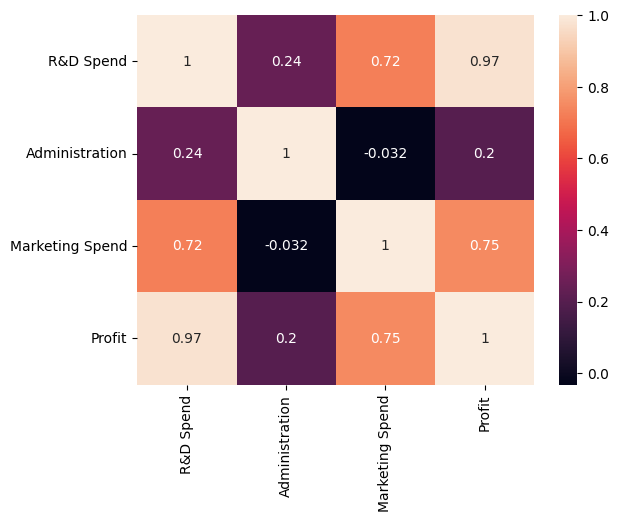

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Figure size 800x800 with 0 Axes>

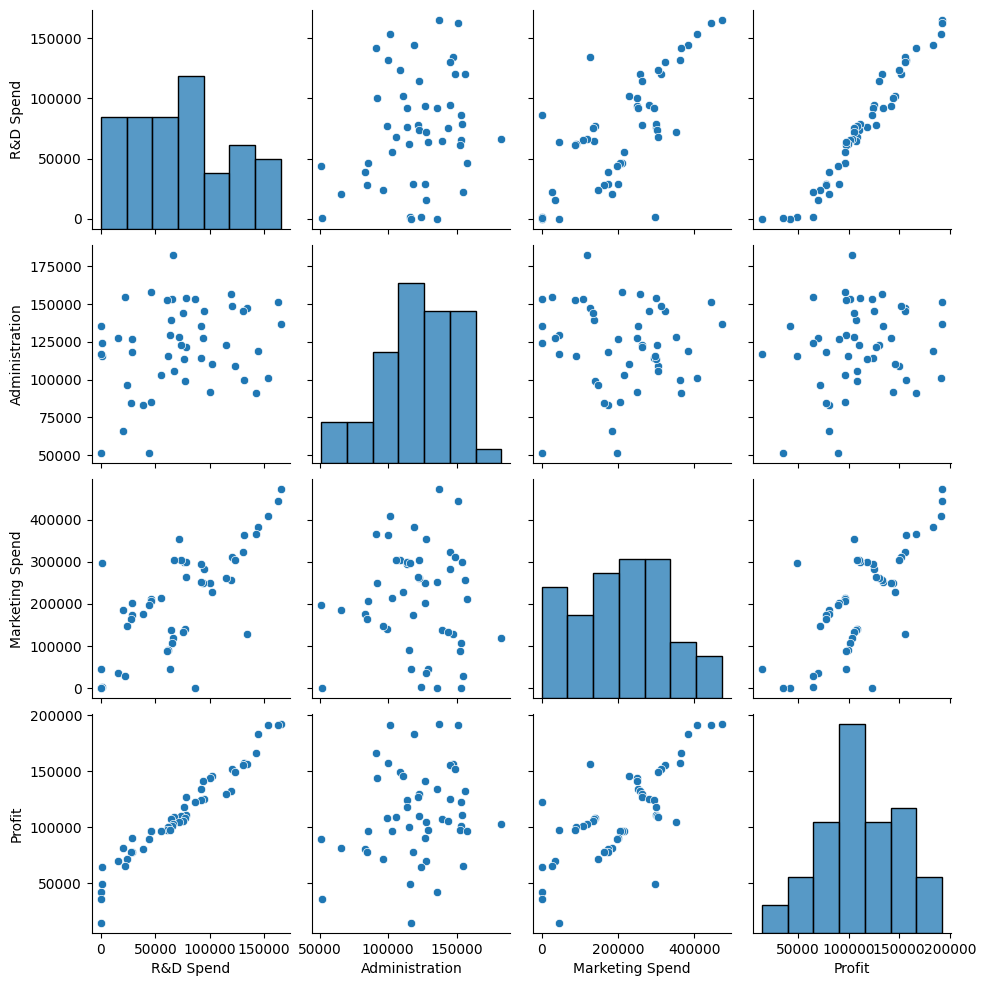

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df)

Independent Features:R&D Spend,Administration,Marketing Spend

Dependent Feature:Profit

In [ ]:
df=df.rename({"R&D Spend":"RDS","Administration":"ATS","Marketing Spend":"MS"},axis=1)

In [ ]:
df.head()

,RDS,ATS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Model Building

In [ ]:
model=smf.ols("Profit~RDS+ATS+MS",data=df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        04:44:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ATS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#build simple linear regression models using ATS and MS because there p values is greater than 0.05
ma=smf.ols("Profit~ATS",data=df).fit()

In [ ]:
ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 08 Oct 2023   Prob (F-statistic):              0.162
Time:                        04:47:48   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ATS            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ma.pvalues

Intercept    0.003824
ATS          0.162217
dtype: float64

In [ ]:
mm=smf.ols("Profit~MS",data=df).fit()

In [ ]:
mm.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [ ]:
mam=smf.ols("Profit~ATS+MS",data=df).fit()

In [ ]:
mam.pvalues

Intercept    2.589341e-01
ATS          1.729198e-02
MS           9.727245e-11
dtype: float64

# Collinearity Check

In [ ]:
m1=smf.ols("RDS~ATS+MS",data=df).fit()
rs_RDS=m1.rsquared
vif_RDS=1/(1-rs_RDS)
vif_RDS

2.4689030699947017

In [ ]:
m2=smf.ols("ATS~RDS+MS",data=df).fit()
rs_ATS=m2.rsquared
vif_ATS=1/(1-rs_ATS)
vif_ATS

1.1750910070550453

In [ ]:
m3=smf.ols("MS~ATS+RDS",data=df).fit()
rs_MS=m3.rsquared
vif_MS=1/(1-rs_MS)
vif_MS

2.326773290530878

In [ ]:
d1={'Variables':['RDS','ATS','MS'],'VIF':[vif_RDS,vif_ATS,vif_MS]}
vif_d1=pd.DataFrame(d1)
vif_d1

,Variables,VIF
0,RDS,2.468903
1,ATS,1.175091
2,MS,2.326773


No variable has VIF>20 ,So there is no collinearity

# Residual Analysis

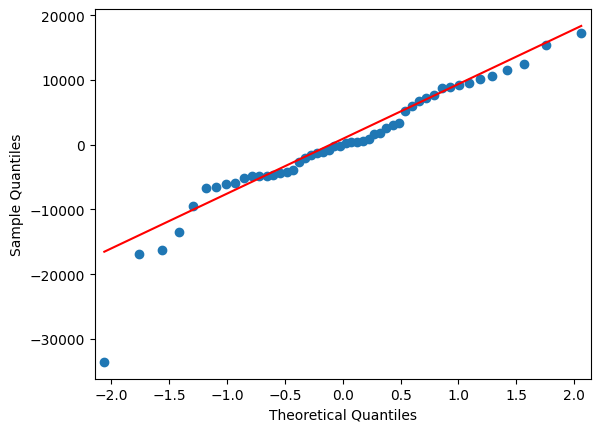

In [ ]:
#test for normality
qqplot = sm.qqplot(model.resid,line="q")

In [ ]:
#standardized values for both residuals and fitted values

def standardize1(v):
  eqn = (v - v.mean())/v.std()
  return eqn

Text(0, 0.5, 'standardized residual values')

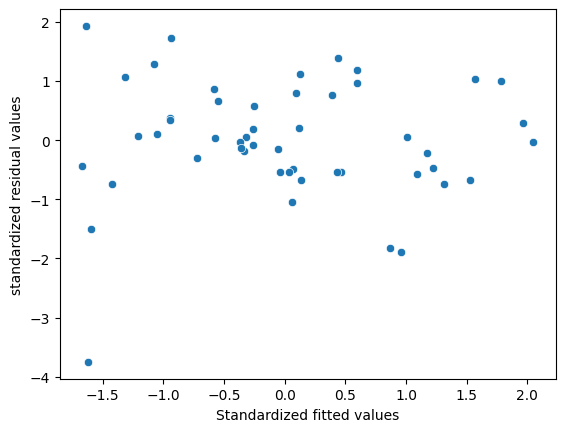

In [ ]:
sns.scatterplot(x = standardize1(model.fittedvalues),y = standardize1(model.resid) )
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")

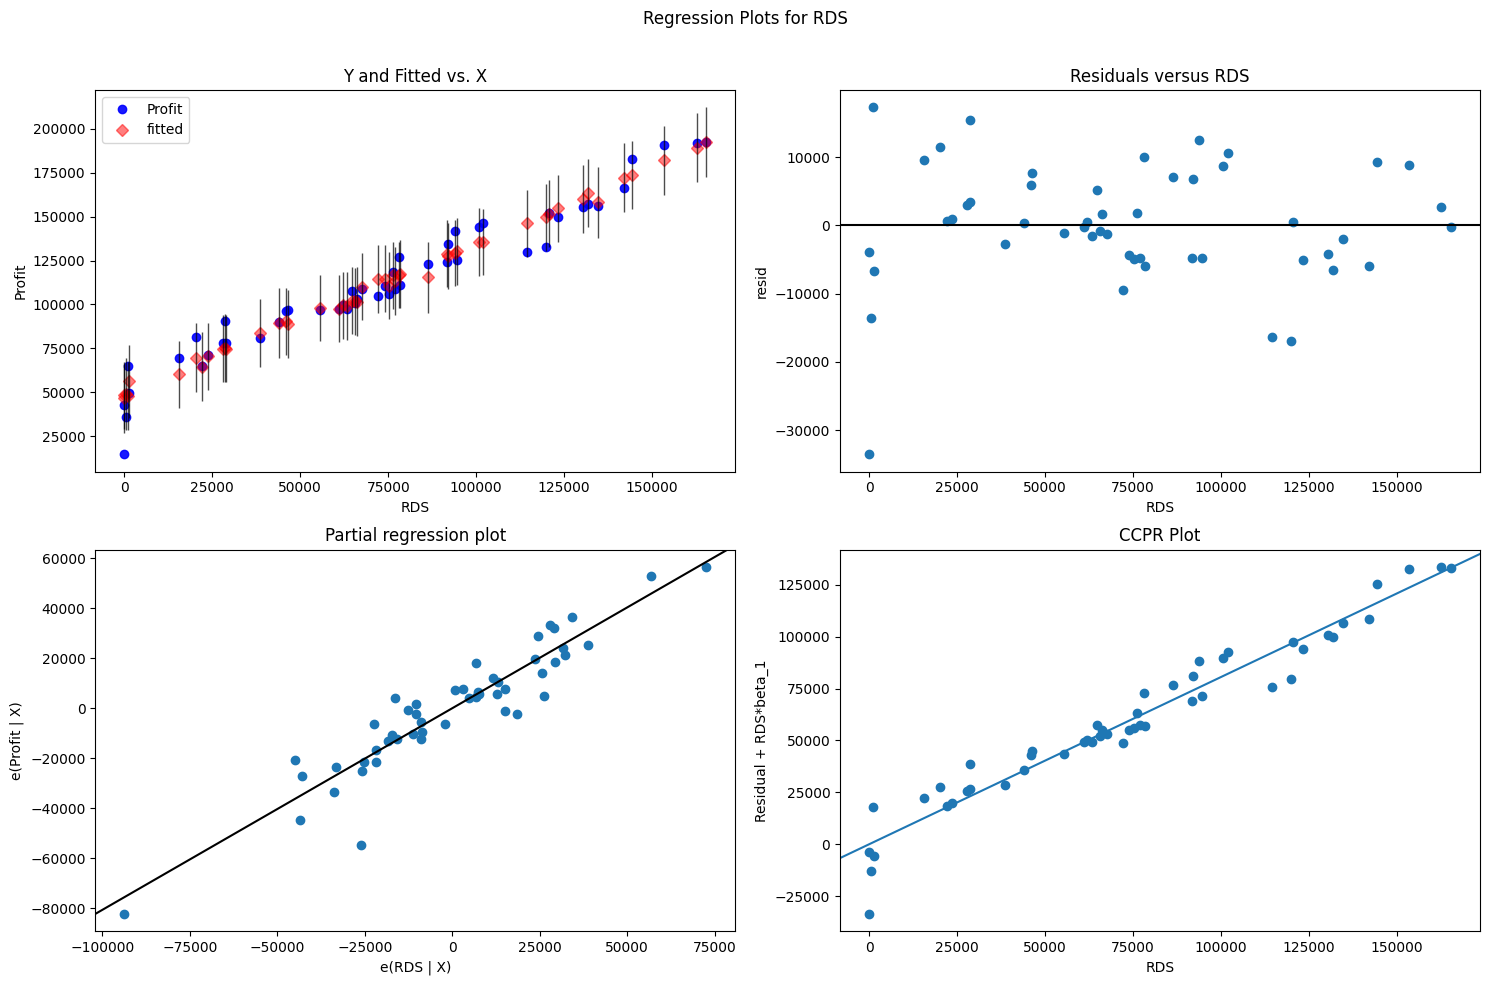

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()


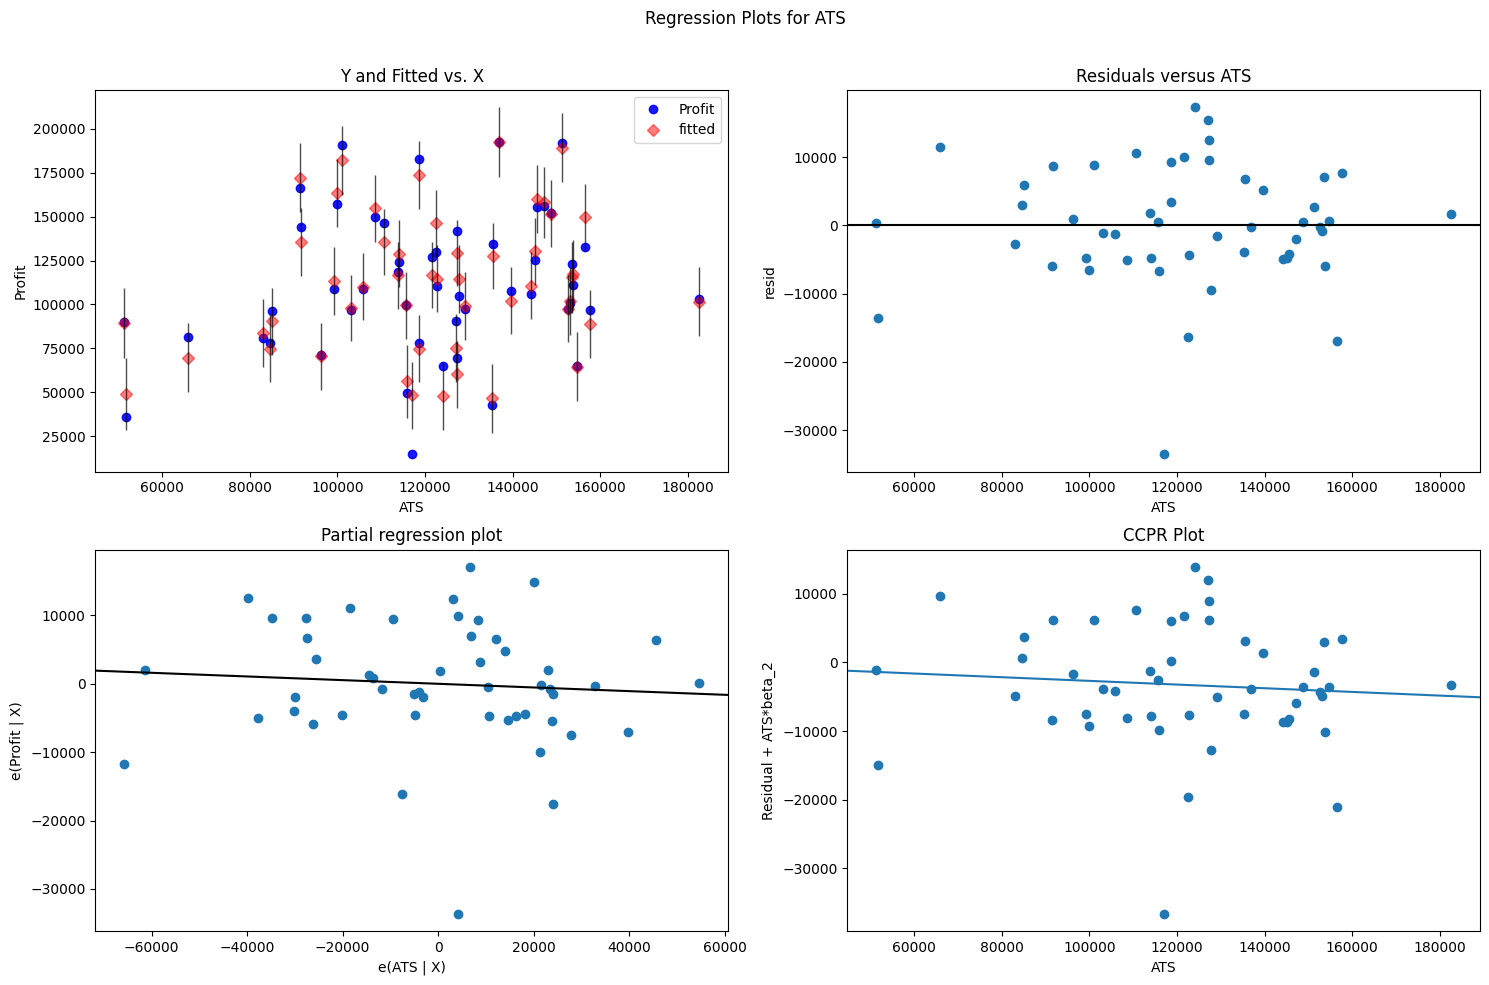

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"ATS",fig=fig)
plt.show()


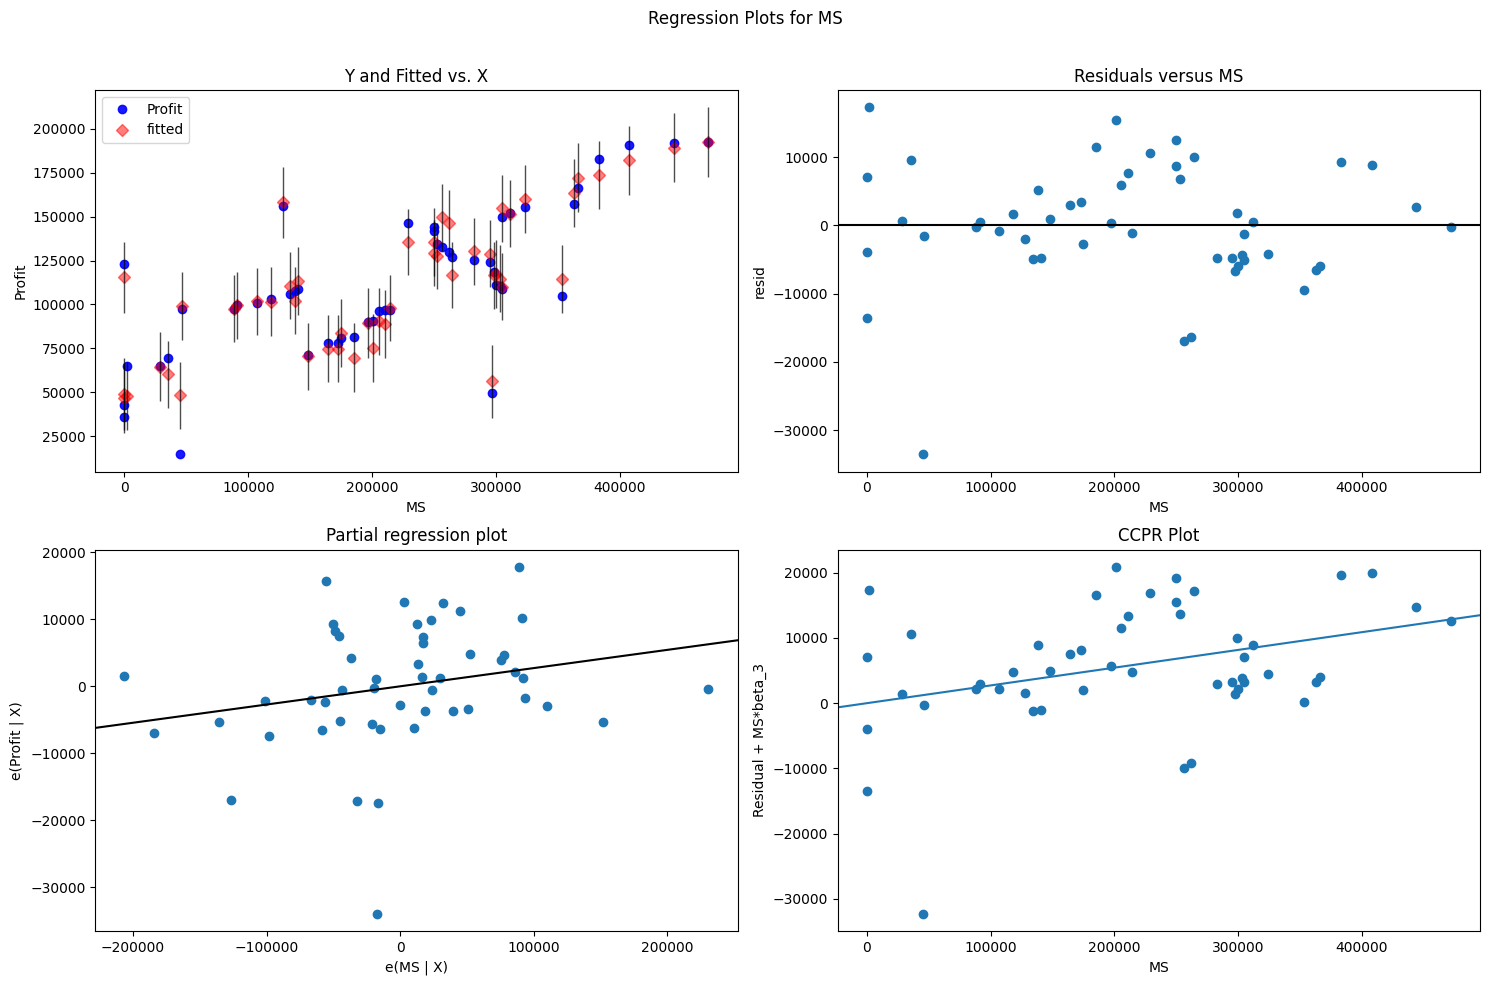

In [ ]:
#residual vs regressors

fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()


# Outlier Detection

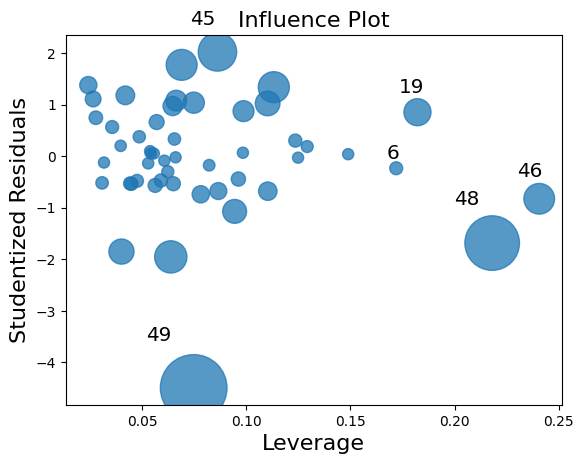

In [ ]:
#detecting influencers or outliers
influence_plot(model)
plt.show()

In [ ]:
k = df.shape[1] #no. features
n = df.shape[0] #no. rows/observations

leverage_cutoff =3*((k+1)/n)

In [ ]:
leverage_cutoff

0.36

In [ ]:
mfv = model.get_influence()
(cv,_)=mfv.cooks_distance

<StemContainer object of 3 artists>

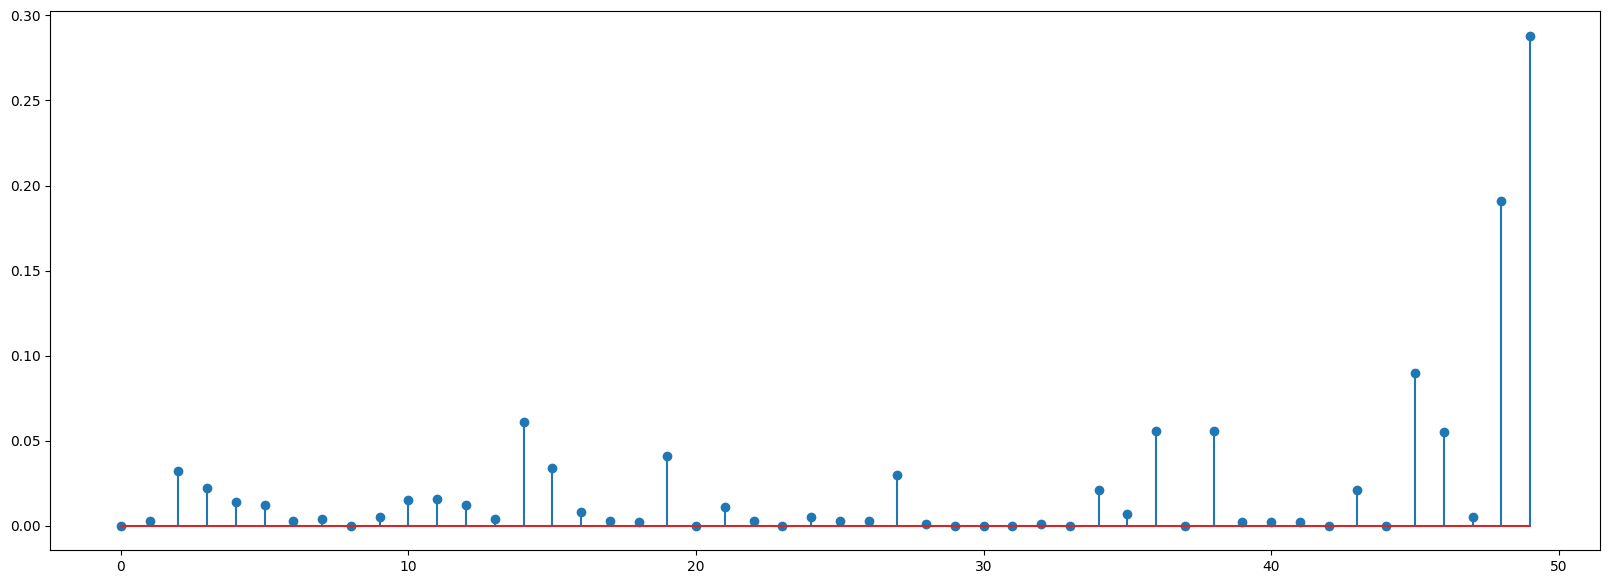

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(49, 0.2880822927543272)

In [ ]:
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)

In [ ]:
df1

,RDS,ATS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
model1=smf.ols("Profit~RDS+ATS+MS",data=df1).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.85e-32
Time:                        05:21:45   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ATS           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mfv1 = model1.get_influence()
(cv,_)=mfv1.cooks_distance

<StemContainer object of 3 artists>

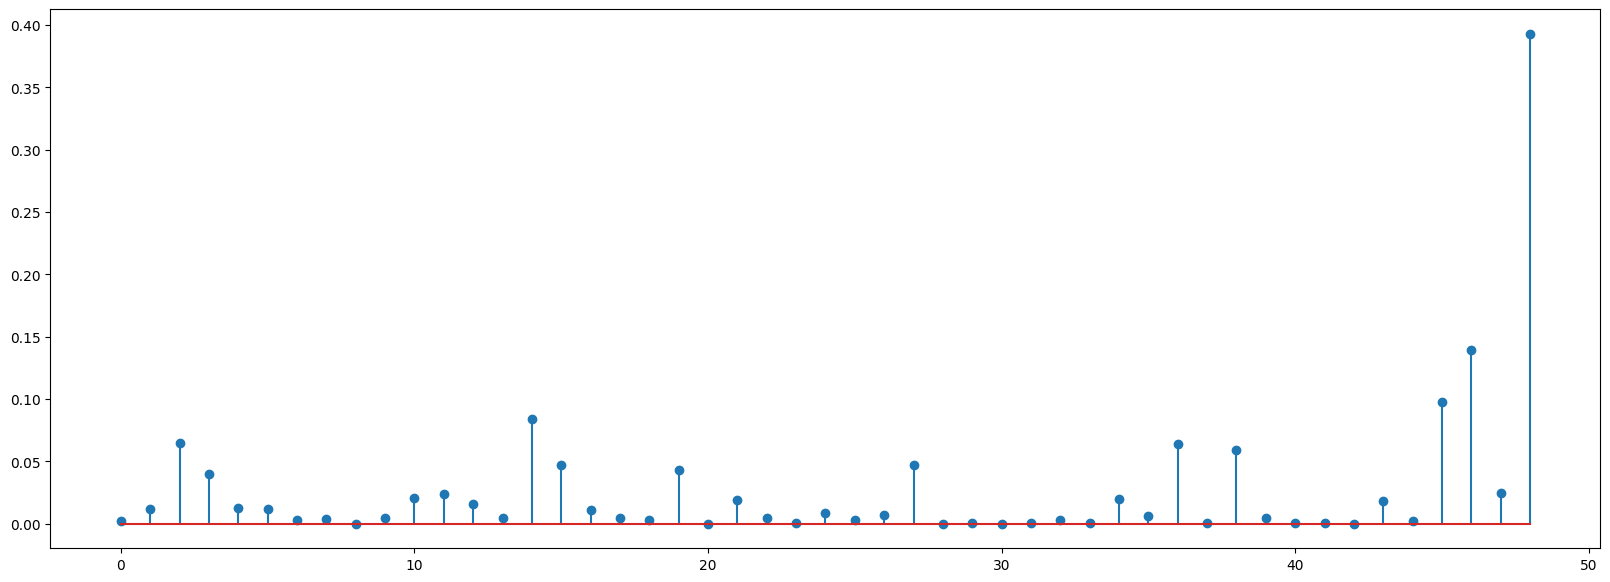

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(48, 0.39274420556321443)

In [ ]:
df1.drop(df.index[[48]],axis=0,inplace=True)
df1=df1.reset_index(drop=True)

In [ ]:
model2=smf.ols("Profit~RDS+ATS+MS",data=df1).fit()

In [ ]:
mfv2 = model2.get_influence()
(cv,_)=mfv2.cooks_distance

<StemContainer object of 3 artists>

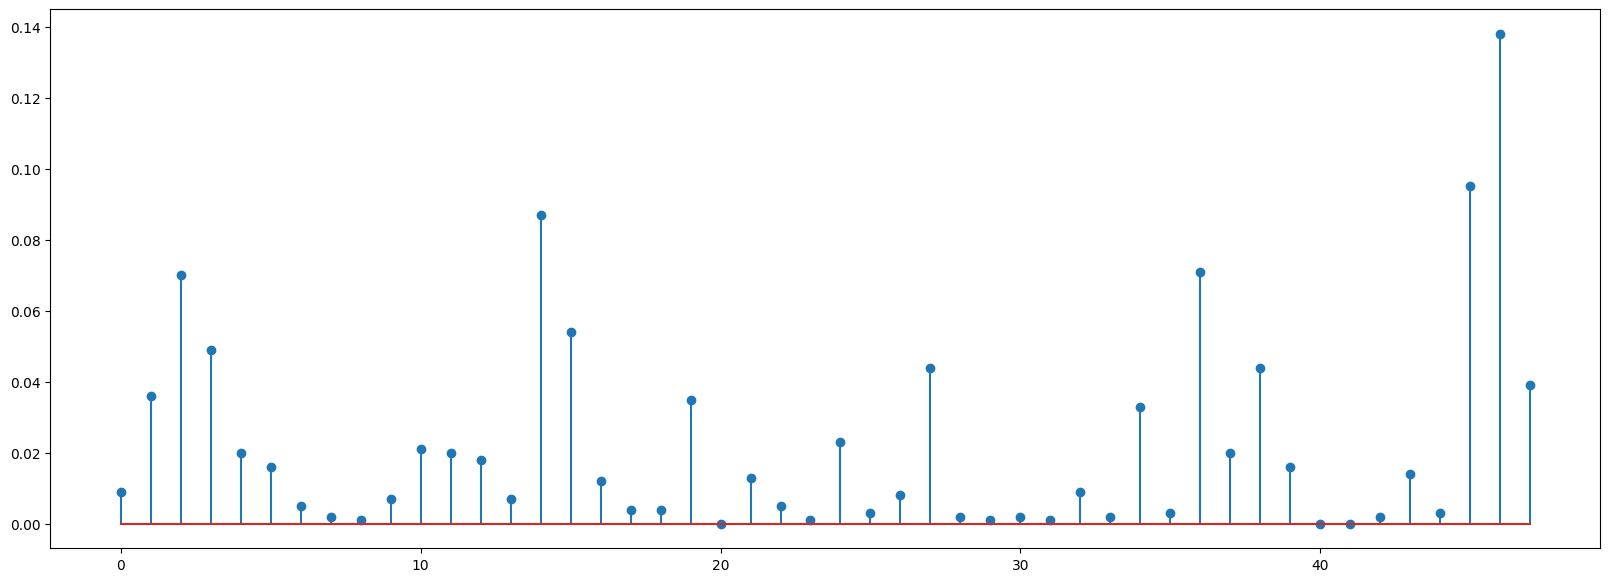

In [ ]:
plt.figure(figsize=(20,7))

plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(46, 0.13829133994334297)

As the cook's distance is less than 0.2 we can stop the diagonistics

In [ ]:
#final Model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.03e-31
Time:                        05:34:40   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ATS           -0.0633      0.044     -1.442      0.156      -0.152       0.025
MS             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2.predict(df)

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
48     56248.562734
49     52450.878563


In [ ]:
new = pd.DataFrame({"RDS":40000,"ATS":95000,"MS":102000},index=[0])
new

,RDS,ATS,MS
0,40000,95000,102000


In [ ]:
model2.predict(new)

0    86383.42199
dtype: float64

In [ ]:
d2={'Prep_Models':['model','model1','model2'],"R^2_value":[model.rsquared,model1.rsquared,model2.rsquared]}
R2table=pd.DataFrame(d2)
R2table

,Prep_Models,R^2_value
0,model,0.950746
1,model1,0.961316
2,model2,0.962677
